<a href="https://www.kaggle.com/code/ruturaj15/data-visualization-introduction?scriptVersionId=201494041" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Visualization

## Categorical Data

### Frequency Table

In [1]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(123)

n_rows = 1000
# Create a sample dataset with 100 rows
data = {
    'Product': np.random.choice
    (['A', 'B', 'C'], size=n_rows),
    'Customer': np.random.choice
    (['John', 'Jane', 'Mike'], size=n_rows),
    'Quantity': np.random.randint (1, 10, size=n_rows),
    'Price': np.random.normal(loc=50, scale=10, size=n_rows).round(2)
}

# convert data to a pandas dataframe
df = pd.DataFrame(data)

In [2]:
# print first 5 rows
print(df.head())

  Product Customer  Quantity  Price
0       C     John         4  40.24
1       B     Mike         6  44.68
2       C     John         6  50.28
3       C     John         1  39.18
4       A     Jane         5  51.86


In [3]:
# Create a frequency table for the "Product" column
frequency_table = df['Product'].value_counts()

#Print the frequency table
print(frequency_table)

Product
B    345
C    337
A    318
Name: count, dtype: int64


##### Bar Chart

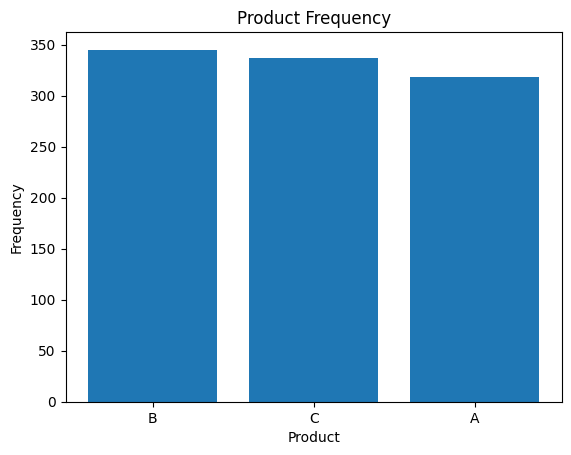

In [4]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(frequency_table.index, frequency_table.values)

# Set the chart title and axes labels
plt.title('Product Frequency')
plt.xlabel('Product')
plt.ylabel('Frequency')

# Display the chart
plt.show()

#### Pie Chart

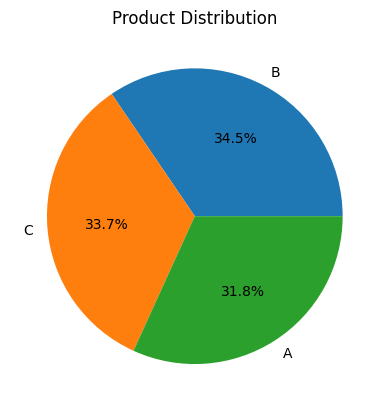

In [5]:
# Create a pie chart
plt.pie(frequency_table.values, labels=frequency_table.index, autopct= '%1.1f%%')

# Set the chart title
plt.title('Product Distribution')

# Display the chart
plt.show()

### Numerical Data

#### Frequency Table

In [6]:
# Define the bin edges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new cloumn 'Price Bins' with interval bins
df['Price Bins'] = pd.cut(df['Price'],bins)

# Print the updated dataFrame with interval bins
print(df.head())

  Product Customer  Quantity  Price Price Bins
0       C     John         4  40.24   (40, 50]
1       B     Mike         6  44.68   (40, 50]
2       C     John         6  50.28   (50, 60]
3       C     John         1  39.18   (30, 40]
4       A     Jane         5  51.86   (50, 60]


In [7]:
# Print the updated DataFrame with interval bins
print(df['Price Bins'].value_counts())

Price Bins
(50, 60]     379
(40, 50]     332
(60, 70]     135
(30, 40]     115
(20, 30]      19
(70, 80]      19
(10, 20]       1
(0, 10]        0
(80, 90]       0
(90, 100]      0
Name: count, dtype: int64


### Histogram

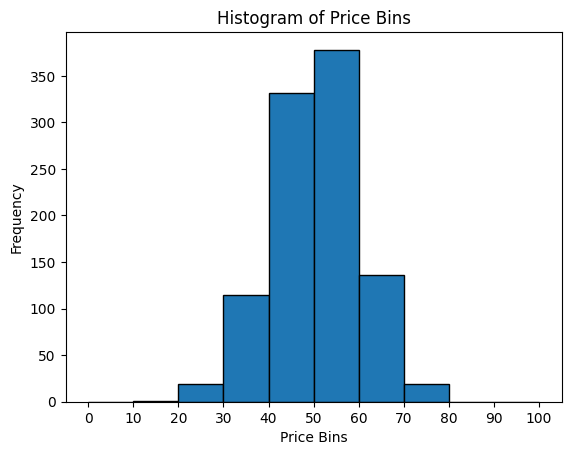

In [8]:
# Create a histogram based on the 'Price Bins' column
plt.hist(df['Price'], bins=bins, edgecolor='black')

# Set the plot labels and title
plt.xlabel('Price Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Price Bins')

# Set all ticks on the x-axis
plt.xticks(bins)

# Display the histogram
plt.show()

### Distribution Plot

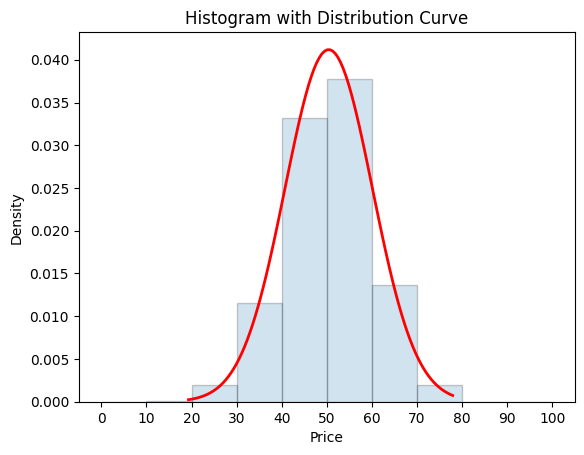

In [9]:
# Create the histogram
plt.hist(df['Price'], bins=bins, edgecolor='black', density=True, alpha = 0.2)

# Generate the PDF for the normal distribution 
mean = df['Price'].mean()
std = df['Price'].std()
x = np.linspace(df['Price'].min(),df['Price'].max(),100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

# Plot the distribution curve
plt.plot(x, pdf, color='red', linewidth=2)

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram with Distribution Curve')

# Set all ticks on the x-axis
plt.xticks(bins)

# Display the histogram
plt.show()

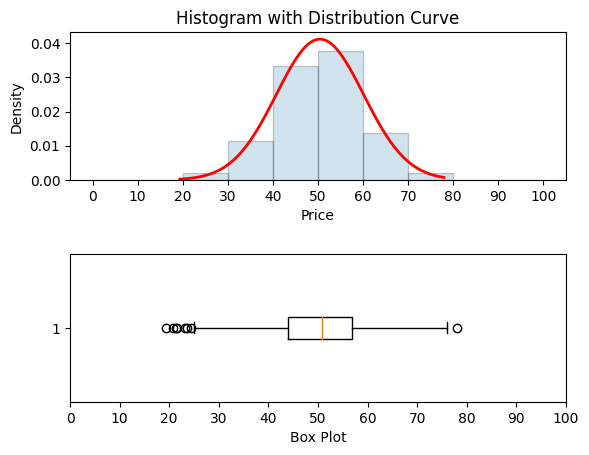

In [10]:
# Create a subplot for the histogram 
plt.subplot(2, 1, 1)

# Create the histogram
plt.hist(df['Price'], bins=bins, edgecolor='black', density=True, alpha = 0.2)
# plt.axvline(df['Price'].mean(), color= 'red', linestyle='--', label = 'mean')

# Generate the PDF for the normal distribution
mean = df['Price'].mean()
std = df['Price'].std()
x = np.linspace(df['Price'].min(),df['Price'].max(), 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

# Plot the distribution curve
plt.plot(x, pdf, color='red', linewidth=2)

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram with Distribution Curve')

# Set all ticks on the x-axis
plt.xticks(bins)

# Create the box plot
plt.subplot(2, 1, 2)
# Create a subplot for the box plot
plt.boxplot(df['Price'], vert=False)
# plt.axvline(df['Price'].mean(),color='red', linestyle='--', label='Mean')
plt.xlabel('Price')
plt.xlabel('Box Plot')

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)

# Set all ticks on the x-axis
plt.xticks(bins)

# Display the plot
plt.show()